In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from functools import *
import itertools
from itertools import combinations
import datetime
import pytz
import operator
from scipy import stats

# Phase One

## Data Analysis

In [2]:
df = pd.read_csv('./framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df = df[df.apply(lambda row: all(val != 'NA' for val in row), axis=1)]

In [4]:
# Inspection of Data Sheet
df.shape

(4238, 16)

In [5]:
# Info on Data Types
df.info()

# Is data set free from NULL Values?
print('')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.9 KB



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# NULL values detected normalize
df = df.dropna()

In [7]:
# Is data set free from NULL Values?
print('')
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Dataset now Cleaned from NULL Values

In [8]:
df.shape

(3656, 16)

In [9]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Distribution of Input Fields

In [10]:
# Basic statistics data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


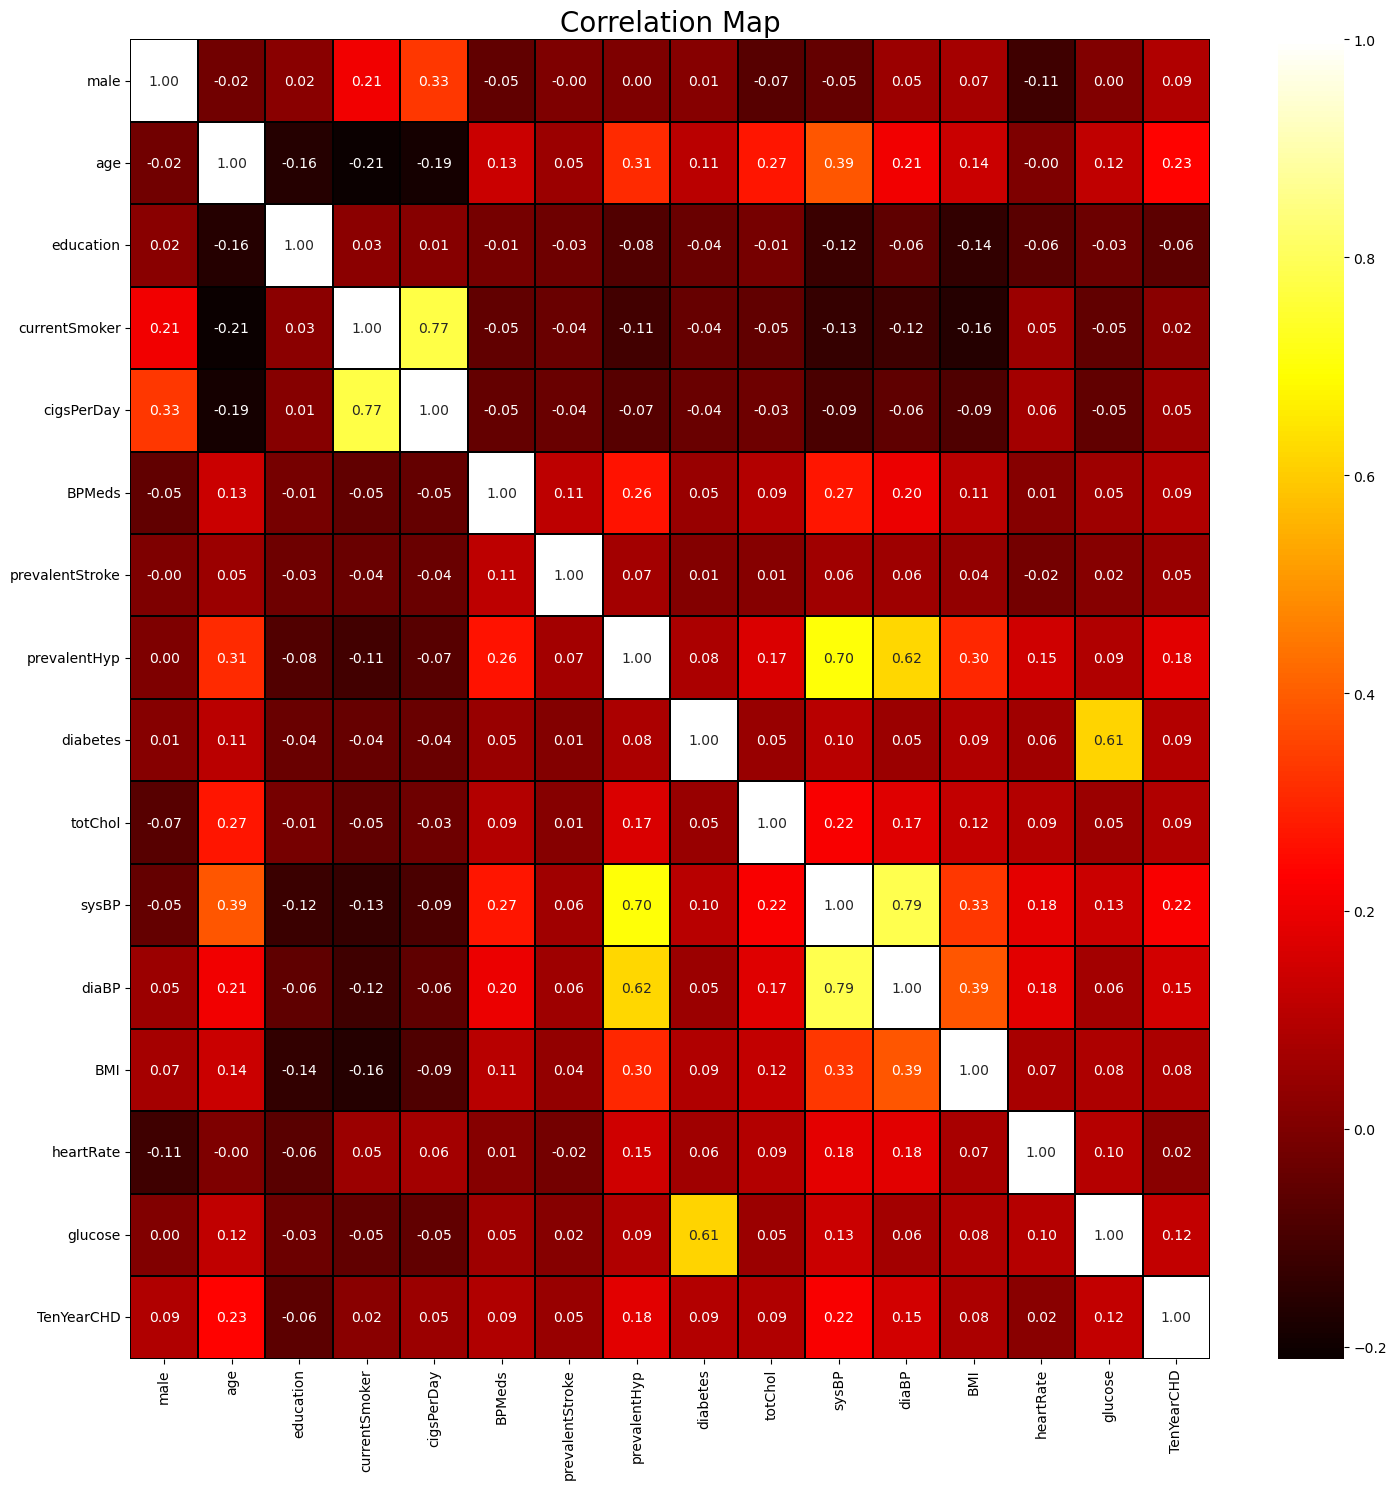

In [11]:
## Correlation between fields
plt.figure(figsize=(15, 15))
sns.heatmap(data=df.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

## Visualization of Data

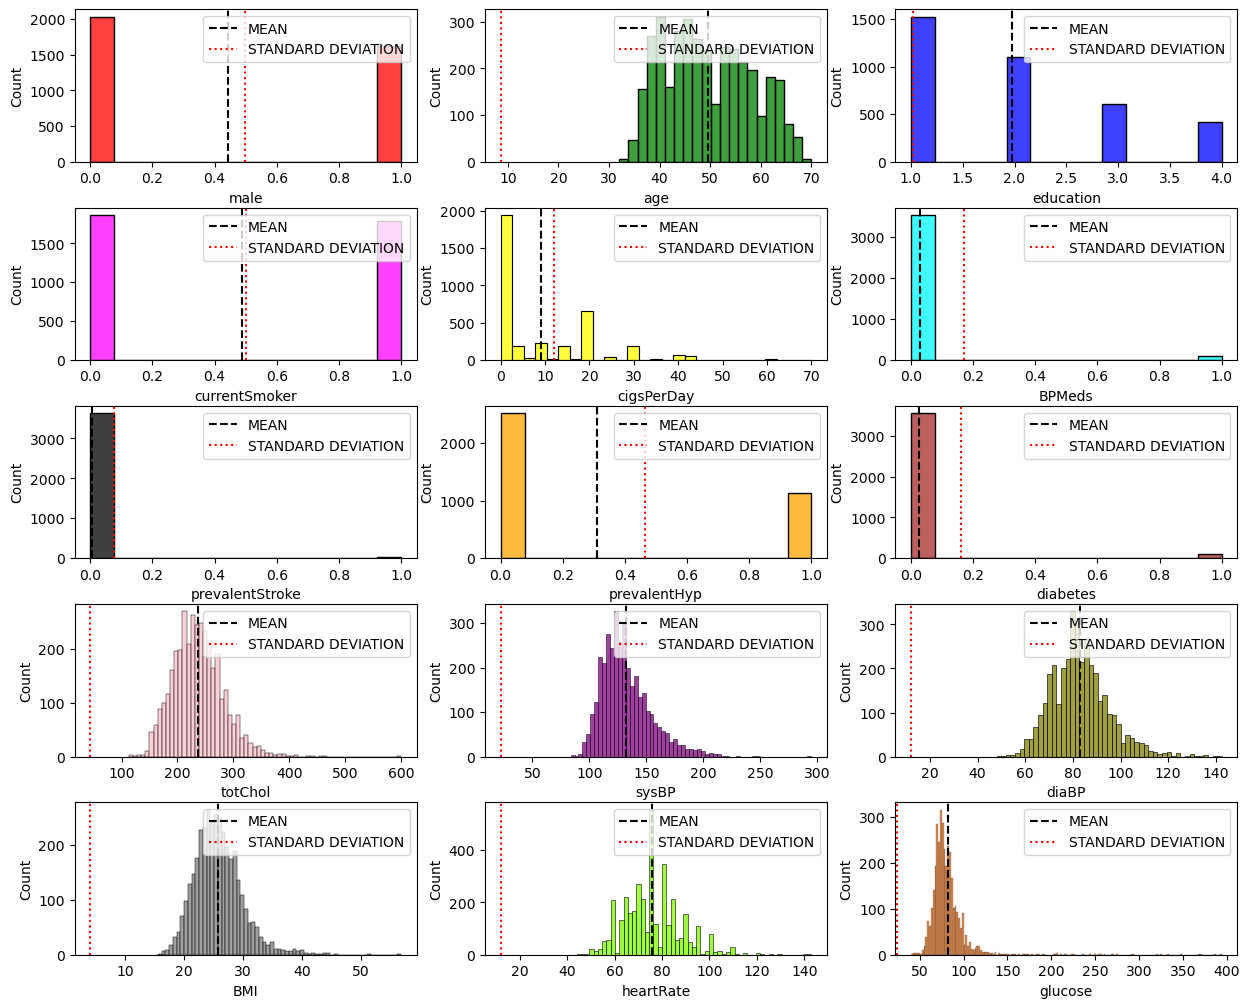

In [12]:
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
columns_length  = len(columns)
columns_colors  = ["red", "green", "blue", "magenta", "yellow", "cyan", "black", "orange", "brown", "pink", "purple", "olive", "gray", "lawngreen", "chocolate"] 

## Make an iterator that aggregates elements from each of the iterables
plt.figure(figsize=(15, 20))
for i, j, k in itertools.zip_longest(columns, range(columns_length), columns_colors):
    plt.subplot(8, 3, j + 1)
    sns.histplot(df[i], color = k)
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(df[i].mean(), color = "black", linestyle="dashed", label="MEAN")
    plt.axvline(df[i].std(), color = "red", linestyle="dotted", label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

## Distribution of Output (TenYearCHD)

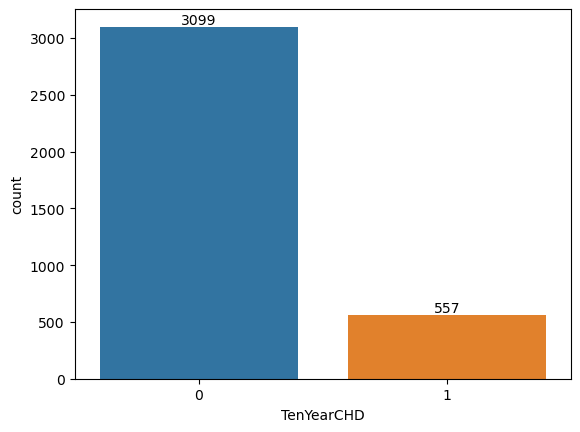

In [13]:
axs = sns.countplot(x=df["TenYearCHD"])

## Count Annotation
for rec in axs.patches:
    axs.annotate(format(rec.get_height(), '.0f'), (rec.get_x() + rec.get_width() / 2.0, rec.get_height()), ha='center', va='center', xytext=(0, 5), textcoords = 'offset points', fontsize=10)
     

## Normalize the Data

In [14]:
normal_df = df.copy()

In [15]:
for column in normal_df.columns:
    normal_df[column] = (normal_df[column] - normal_df[column].min()) / (normal_df[column].max() - normal_df[column].min())

In [16]:
normal_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


## Display Normalized Data

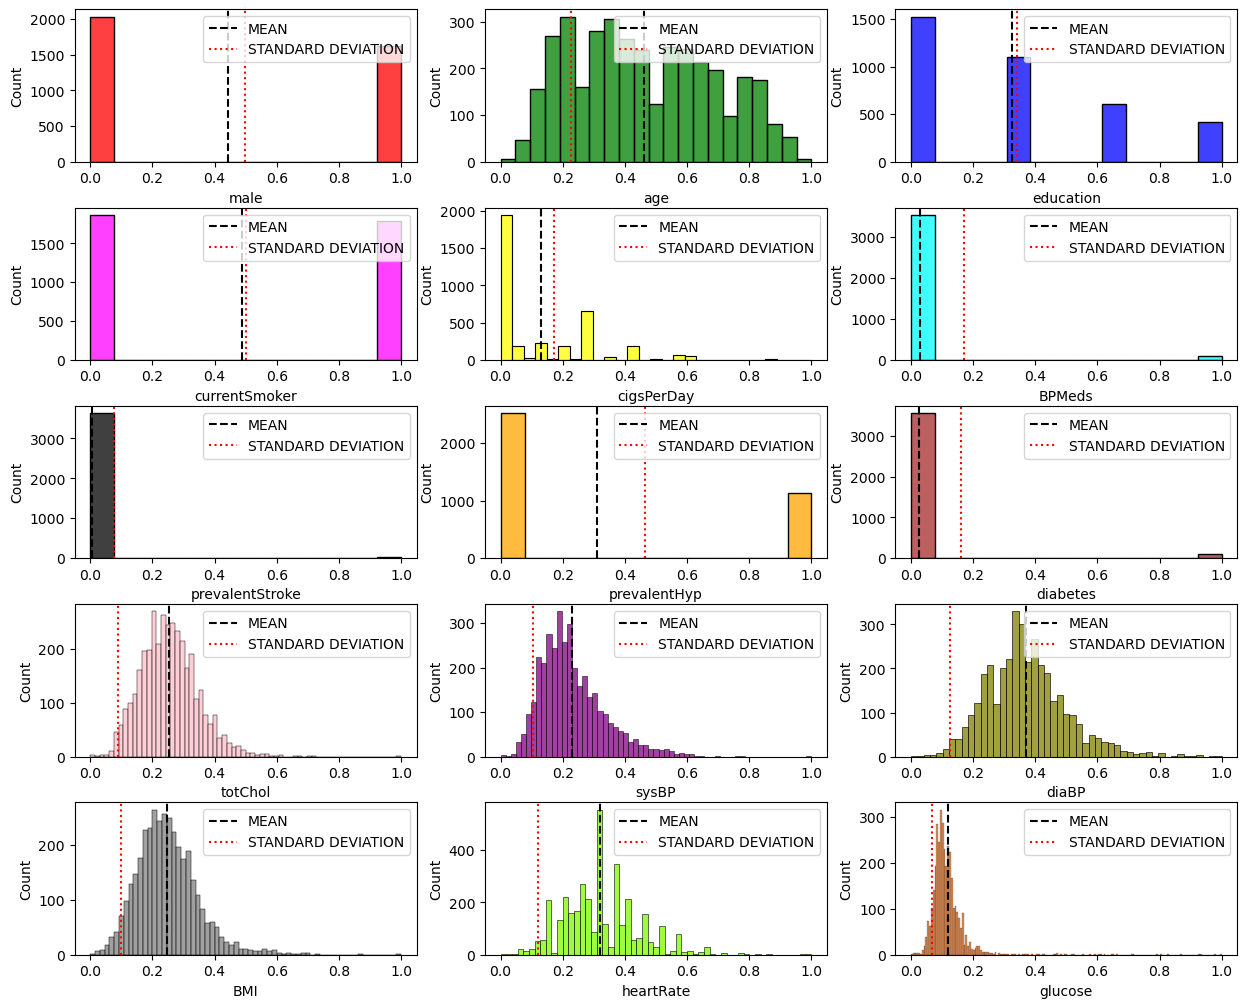

In [17]:
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
columns_length  = len(columns)
columns_colors  = ["red", "green", "blue", "magenta", "yellow", "cyan", "black", "orange", "brown", "pink", "purple", "olive", "gray", "lawngreen", "chocolate"] 

## Make an iterator that aggregates elements from each of the iterables
plt.figure(figsize=(15, 20))
for i, j, k in itertools.zip_longest(columns, range(columns_length), columns_colors):
    plt.subplot(8, 3, j + 1)
    sns.histplot(normal_df[i], color = k)
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(normal_df[i].mean(), color = "black", linestyle="dashed", label="MEAN")
    plt.axvline(normal_df[i].std(), color = "red", linestyle="dotted", label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

## Display Normalized Statistics

In [18]:
# Basic statistics data
normal_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,0.462038,0.326586,0.489059,0.128888,0.030361,0.005744,0.311543,0.027079,0.254360,0.231054,0.369440,0.248284,0.320511,0.118238,0.152352
std,0.496883,0.225293,0.340886,0.499949,0.170270,0.171602,0.075581,0.463187,0.162335,0.090547,0.104456,0.126718,0.098544,0.121040,0.067543,0.359411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190965,0.158392,0.285714,0.182744,0.242424,0.087571,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248460,0.210402,0.359788,0.238488,0.313131,0.107345,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.308522,0.286052,0.444444,0.302957,0.383838,0.132768,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.utils import shuffle
normal_df = shuffle(normal_df)

# Phase 2

## Create the model after shuffling entries

In [20]:
Y = normal_df["TenYearCHD"]
X = normal_df.drop(columns="TenYearCHD")

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Overfit the entire model, allowing us to gain the knowledge of how big the final model needs to be roughly

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim = len(X[0, :]), activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,761 (10.79 KB)

 Trainable params: 2,761 (10.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
history = model.fit(X, Y,  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8546 - loss: 0.4159
Epoch 2/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.8446 - loss: 0.4263
Epoch 3/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8554 - loss: 0.3876
Epoch 4/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8434 - loss: 0.3953
Epoch 5/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8444 - loss: 0.3971
Epoch 6/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8444 - loss: 0.3872
Epoch 7/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8536 - loss: 0.3767
Epoch 8/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8471 - loss: 0.3866
Epoch 9/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8492 - loss: 0.3831
Epoch 10/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8472 - loss: 0.3873
Epoch 11/400
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8493 - loss: 0.3862
Epoch 12/400
366/36

## Prediction Data

In [25]:
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

True Validation Data:
143     1.0
2477    0.0
2498    1.0
2281    0.0
3102    1.0
801     0.0
4109    1.0
3499    0.0
2813    0.0
1404    0.0
Name: TenYearCHD, dtype: float64
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
Prediction:
[[0.8349994  0.02000208 0.8427577  0.0183832  0.8423178  0.03000037
  0.19723769 0.09976763 0.01877576 0.03627827]]


## Model Metric and Results

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 93.00%
Precision: 85.08%
Recall: 65.53%
F1-score: 0.74


# Phase 3

## The Creation of the Baseline Neural Network

First the splitting of the normalized dataset into training and validation for use in modeling

In [27]:
normal_df = normal_df.sample(frac=1).reset_index(drop=True)

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns="TenYearCHD")
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns="TenYearCHD")

In [28]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [29]:
mean = train_X.mean(axis=0)
train_X -= mean
std = train_X.std(axis=0)
train_X /= std

mean = valid_X.mean(axis=0)
valid_X -= mean
std = valid_X.std(axis=0)
valid_X /= std

Baseline Model - Uses Binary Classification Neural Network

In [30]:
baseModel = Sequential()
baseModel.add(Dense(15, input_dim = len(train_X[0, :]), activation='sigmoid'))
baseModel.add(Dense(1, activation='sigmoid'))

baseModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_base_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
baseHistory = baseModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4079 - loss: 0.7685 - val_accuracy: 0.8678 - val_loss: 0.4327
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8211 - loss: 0.4569 - val_accuracy: 0.8678 - val_loss: 0.3699
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8350 - loss: 0.4073 - val_accuracy: 0.8678 - val_loss: 0.3604
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.8419 - loss: 0.3921 - val_accuracy: 0.8678 - val_loss: 0.3579
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8345 - loss: 0.4031 - val_accuracy: 0.8660 - val_loss: 0.3558
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8420 - loss: 0.3946 - val_accuracy: 0.8669 - val_loss: 0.3555
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8517 - loss: 0.3824 - val_accuracy: 0.8687 - val_loss: 0.3550
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8429 - loss: 0.3978 - val_ac

In [31]:
# Evaluate on the training set (should deliver high accuracy)
P = baseModel.predict(train_X)
accuracy = baseModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8672 - loss: 0.3272


In [32]:
#Evaluate on the validation set
P = baseModel.predict(valid_X)
accuracy = baseModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8394 - loss: 0.4007


## The history of the baseline

{'verbose': 'auto', 'epochs': 400, 'steps': 256}


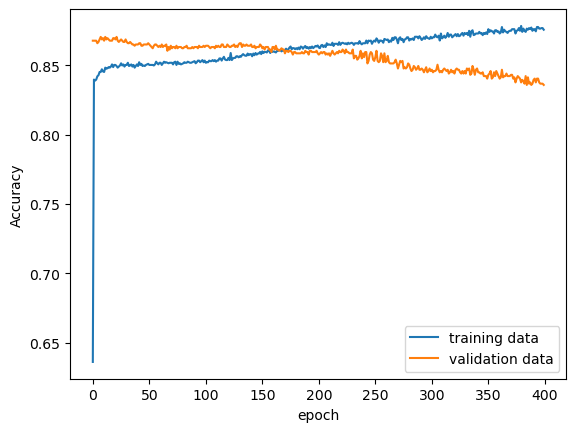

In [33]:
print(baseHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(baseHistory.history['accuracy']) 
plt.plot(baseHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Logistic Regression instead of baseline Neural Network now

In [34]:
# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns="TenYearCHD")
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns="TenYearCHD")

In [35]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [36]:
logModel = Sequential()
logModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

logModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_log_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
logHistory = logModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.4898 - loss: 0.8237 - val_accuracy: 0.6071 - val_loss: 0.7115
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.6315 - loss: 0.6617 - val_accuracy: 0.7110 - val_loss: 0.6153
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7235 - loss: 0.5873 - val_accuracy: 0.7657 - val_loss: 0.5481
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7698 - loss: 0.5279 - val_accuracy: 0.7976 - val_loss: 0.4985
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8006 - loss: 0.4853 - val_accuracy: 0.8177 - val_loss: 0.4627
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8284 - loss: 0.4485 - val_accuracy: 0.8405 - val_loss: 0.4351
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8302 - loss: 0.4390 - val_accuracy: 0.8459 - val_loss: 0.4158
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8312 - loss: 0.4229 - val_

In [37]:
# Evaluate on the training set (should deliver high accuracy)
P = logModel.predict(train_X)
accuracy = logModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8446 - loss: 0.3980


In [38]:
#Evaluate on the validation set
P = logModel.predict(valid_X)
accuracy = logModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8703 - loss: 0.3478


{'verbose': 'auto', 'epochs': 400, 'steps': 256}


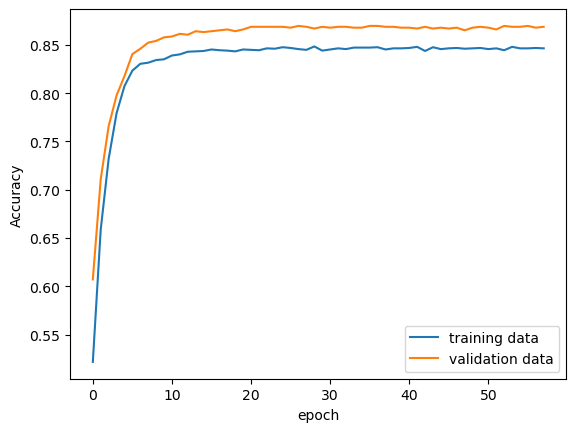

In [39]:
print(logHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(logHistory.history['accuracy']) 
plt.plot(logHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Neural Network in 32-16-8-4-2-1: NNHigh

In [40]:
# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns="TenYearCHD")
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns="TenYearCHD")

In [41]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [42]:
mean = train_X.mean(axis=0)
train_X -= mean
std = train_X.std(axis=0)
train_X /= std

mean = valid_X.mean(axis=0)
valid_X -= mean
std = valid_X.std(axis=0)
valid_X /= std

In [43]:
NN_HighModel = Sequential()
NN_HighModel.add(Dense(32, input_dim = len(train_X[0, :]), activation='sigmoid'))
NN_HighModel.add(Dense(16, activation='sigmoid'))
NN_HighModel.add(Dense(8, activation='sigmoid'))
NN_HighModel.add(Dense(2, activation='sigmoid'))
NN_HighModel.add(Dense(1, activation='sigmoid'))

NN_HighModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'best_NN_High_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
NN_HighHistory = NN_HighModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4622 - loss: 0.6952 - val_accuracy: 0.8678 - val_loss: 0.4948
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8435 - loss: 0.4932 - val_accuracy: 0.8678 - val_loss: 0.4304
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8320 - loss: 0.4660 - val_accuracy: 0.8678 - val_loss: 0.4080
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8362 - loss: 0.4494 - val_accuracy: 0.8678 - val_loss: 0.3999
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8395 - loss: 0.4414 - val_accuracy: 0.8678 - val_loss: 0.3952
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8400 - loss: 0.4372 - val_accuracy: 0.8678 - val_loss: 0.3888
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8415 - loss: 0.4250 - val_accuracy: 0.8678 - val_loss: 0.3802
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8397 - loss: 0.4146 - val_ac

In [44]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_HighModel.predict(train_X)
accuracy = NN_HighModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9301 - loss: 0.2530


In [45]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_HighModel.predict(valid_X)
accuracy = NN_HighModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8222 - loss: 0.5068


{'verbose': 'auto', 'epochs': 400, 'steps': 256}


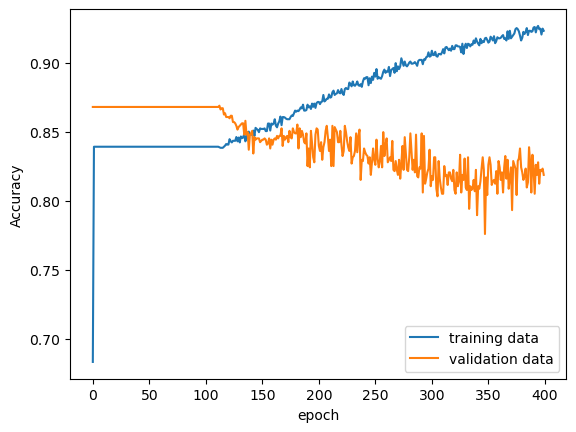

In [46]:
print(NN_HighHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(NN_HighHistory.history['accuracy']) 
plt.plot(NN_HighHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Neural Network 16-8-2-1: NN_MedModel

In [52]:
NN_MedModel = Sequential()
NN_MedModel.add(Dense(16, input_dim = len(train_X[0, :]), activation='sigmoid'))
NN_MedModel.add(Dense(8, activation='sigmoid'))
NN_MedModel.add(Dense(2, activation='sigmoid'))
NN_MedModel.add(Dense(1, activation='sigmoid'))

NN_MedModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'best_NN_Med_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
NN_MedHistory = NN_MedModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1620 - loss: 0.9911 - val_accuracy: 0.1322 - val_loss: 0.7150
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.5645 - loss: 0.6809 - val_accuracy: 0.8678 - val_loss: 0.6016
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8398 - loss: 0.5934 - val_accuracy: 0.8678 - val_loss: 0.5402
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8527 - loss: 0.5375 - val_accuracy: 0.8678 - val_loss: 0.4995
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8382 - loss: 0.5129 - val_accuracy: 0.8678 - val_loss: 0.4701
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8332 - loss: 0.4947 - val_accuracy: 0.8678 - val_loss: 0.4489
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8411 - loss: 0.4713 - val_accuracy: 0.8678 - val_loss: 0.4330
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8459 - loss: 0.4

In [53]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_MedModel.predict(train_X)
accuracy = NN_MedModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8866 - loss: 0.3170


In [54]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_MedModel.predict(valid_X)
accuracy = NN_MedModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8146 - loss: 0.4917


{'verbose': 'auto', 'epochs': 400, 'steps': 256}


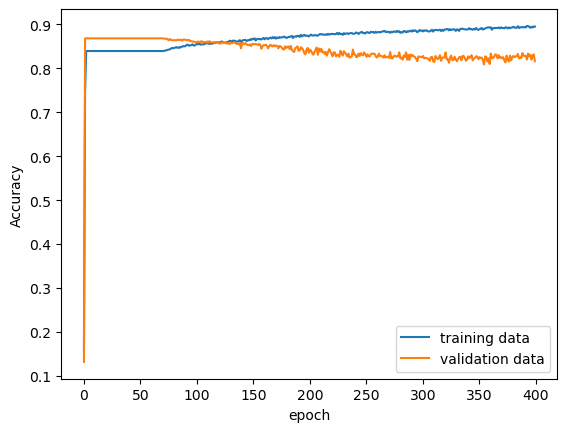

In [55]:
print(NN_MedHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(NN_MedHistory.history['accuracy']) 
plt.plot(NN_MedHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [56]:
NN_LowModel = Sequential()
NN_LowModel.add(Dense(8, input_dim = len(train_X[0, :]), activation='sigmoid'))
NN_LowModel.add(Dense(2, activation='sigmoid'))
NN_LowModel.add(Dense(1, activation='sigmoid'))

NN_LowModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'best_NN_Low_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
NN_LowHistory = NN_LowModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8383 - loss: 0.6020 - val_accuracy: 0.8678 - val_loss: 0.4768
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8340 - loss: 0.4893 - val_accuracy: 0.8678 - val_loss: 0.4207
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8355 - loss: 0.4519 - val_accuracy: 0.8678 - val_loss: 0.3982
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8333 - loss: 0.4416 - val_accuracy: 0.8678 - val_loss: 0.3869
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8451 - loss: 0.4175 - val_accuracy: 0.8678 - val_loss: 0.3798
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8246 - loss: 0.4404 - val_accuracy: 0.8678 - val_loss: 0.3739
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8442 - loss: 0.4073 - val_accuracy: 0.8678 - val_loss: 0.3708
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8456 - loss: 0.4

In [57]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_LowModel.predict(train_X)
accuracy = NN_LowModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8622 - loss: 0.3595


In [58]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_LowModel.predict(valid_X)
accuracy = NN_LowModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8636 - loss: 0.3751


{'verbose': 'auto', 'epochs': 400, 'steps': 256}


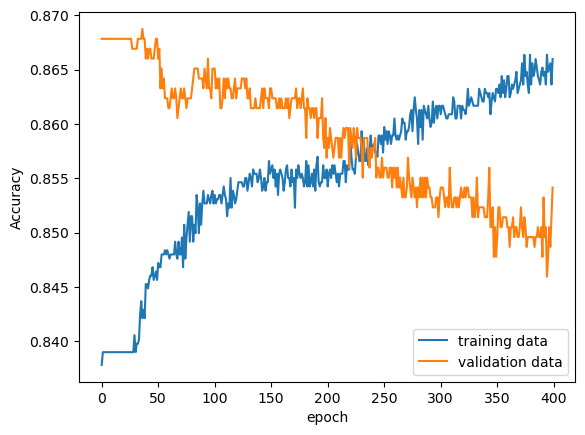

In [59]:
print(NN_LowHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(NN_LowHistory.history['accuracy']) 
plt.plot(NN_LowHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Neural Network Lowest (2-1)

In [60]:
NN_MinModel = Sequential()
NN_MinModel.add(Dense(8, input_dim = len(train_X[0, :]), activation='sigmoid'))
NN_MinModel.add(Dense(2, activation='sigmoid'))
NN_MinModel.add(Dense(1, activation='sigmoid'))

NN_MinModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'best_NN_Min_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
NN_MinHistory = NN_MinModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5660 - loss: 0.6704 - val_accuracy: 0.8678 - val_loss: 0.5310
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8353 - loss: 0.5262 - val_accuracy: 0.8678 - val_loss: 0.4527
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8444 - loss: 0.4663 - val_accuracy: 0.8678 - val_loss: 0.4197
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8413 - loss: 0.4458 - val_accuracy: 0.8678 - val_loss: 0.4021
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8357 - loss: 0.4423 - val_accuracy: 0.8678 - val_loss: 0.3923
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8318 - loss: 0.4393 - val_accuracy: 0.8678 - val_loss: 0.3849
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8422 - loss: 0.4192 - val_accuracy: 0.8678 - val_loss: 0.3796
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8433 - loss: 0.4

In [61]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_MinModel.predict(train_X)
accuracy = NN_MinModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8567 - loss: 0.3576


In [62]:
# Evaluate on the training set (should deliver high accuracy)
P = NN_MinModel.predict(valid_X)
accuracy = NN_MinModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8426 - loss: 0.3861


{'verbose': 'auto', 'epochs': 400, 'steps': 256}


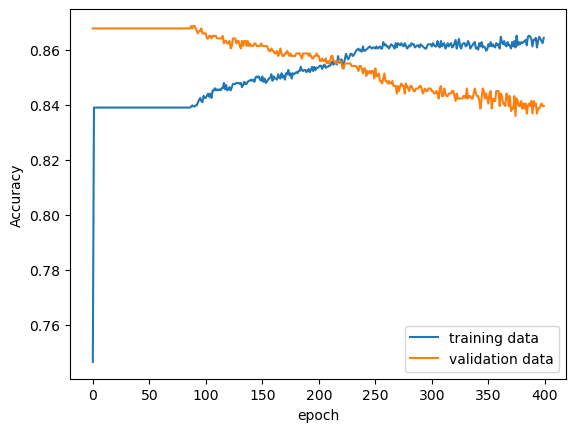

In [63]:
print(NN_MinHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(NN_MinHistory.history['accuracy']) 
plt.plot(NN_MinHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

# Phase 4

## Elimination of Uneeded Variables in Model

The model chosen after running all models is the Logistic Regression model which had the best performance overall. Now using the same model it is time to run through inputs one at a time to determine their usage in the model

## Gender Attribute

In [65]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","male"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","male"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [66]:
genderModel = Sequential()
genderModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

genderModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_gender_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
genderHistory = genderModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5613 - loss: 0.7867 - val_accuracy: 0.6144 - val_loss: 0.7372
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6610 - loss: 0.6609 - val_accuracy: 0.7037 - val_loss: 0.6350
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.7323 - loss: 0.5707 - val_accuracy: 0.7603 - val_loss: 0.5606
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7870 - loss: 0.5208 - val_accuracy: 0.8022 - val_loss: 0.5051
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8262 - loss: 0.4679 - val_accuracy: 0.8213 - val_loss: 0.4655
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8162 - loss: 0.4616 - val_accuracy: 0.8396 - val_loss: 0.4370
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8249 - loss: 0.4430 - val_accuracy: 0.8459 - val_loss: 0.4170
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.8382 - loss: 0.4225 - val_ac

In [69]:
genderAccuracy = genderModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8751 - loss: 0.3521


## Age Attribute

In [70]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","age"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","age"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [71]:
ageModel = Sequential()
ageModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

ageModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_age_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
ageHistory = ageModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.5600 - loss: 0.8048 - val_accuracy: 0.6335 - val_loss: 0.6890
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.6422 - loss: 0.6624 - val_accuracy: 0.7548 - val_loss: 0.5804
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7589 - loss: 0.5671 - val_accuracy: 0.8295 - val_loss: 0.5142
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8078 - loss: 0.5124 - val_accuracy: 0.8459 - val_loss: 0.4711
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8196 - loss: 0.4852 - val_accuracy: 0.8523 - val_loss: 0.4415
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.8051 - loss: 0.4736 - val_accuracy: 0.8587 - val_loss: 0.4206
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8411 - loss: 0.4292 - val_accuracy: 0.8614 - val_loss: 0.4052
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8452 - loss: 0.4188 - val_

In [72]:
ageAccuracy = ageModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8711 - loss: 0.3494


## Education Attribute

In [73]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","education"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","education"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [74]:
educationModel = Sequential()
educationModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

educationModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_education_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
educationHistory = educationModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6328 - loss: 0.8153 - val_accuracy: 0.6609 - val_loss: 0.7188
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6641 - loss: 0.6813 - val_accuracy: 0.7238 - val_loss: 0.6127
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7371 - loss: 0.5829 - val_accuracy: 0.7931 - val_loss: 0.5379
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.7818 - loss: 0.5385 - val_accuracy: 0.8286 - val_loss: 0.4861
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8128 - loss: 0.4836 - val_accuracy: 0.8441 - val_loss: 0.4504
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8297 - loss: 0.4530 - val_accuracy: 0.8487 - val_loss: 0.4247
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8284 - loss: 0.4344 - val_accuracy: 0.8560 - val_loss: 0.4067
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8257 - loss: 0.4242 - val_ac

In [75]:
educationAccuracy = educationModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8688 - loss: 0.3467


## currentSmoker Attribute

In [76]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","currentSmoker"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","currentSmoker"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [77]:
currentSmokerModel = Sequential()
currentSmokerModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

currentSmokerModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_currentSmoker_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
currentSmokerHistory = currentSmokerModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.5731 - loss: 0.8050 - val_accuracy: 0.6418 - val_loss: 0.7132
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.6610 - loss: 0.6732 - val_accuracy: 0.7183 - val_loss: 0.6114
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7029 - loss: 0.6019 - val_accuracy: 0.7694 - val_loss: 0.5392
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7808 - loss: 0.5228 - val_accuracy: 0.8131 - val_loss: 0.4879
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8156 - loss: 0.4927 - val_accuracy: 0.8450 - val_loss: 0.4515
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8349 - loss: 0.4576 - val_accuracy: 0.8541 - val_loss: 0.4253
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8490 - loss: 0.4265 - val_accuracy: 0.8614 - val_loss: 0.4065
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8488 - loss: 0.4151 - val_

In [78]:
currentSmokerAccuracy = currentSmokerModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8719 - loss: 0.3466


## Cigarettes Per Day Attribute

In [79]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","cigsPerDay"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","cigsPerDay"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [80]:
cigsPerDayModel = Sequential()
cigsPerDayModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

cigsPerDayModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_cigsPerDay_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
cigsPerDayHistory = cigsPerDayModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.5607 - loss: 0.7930 - val_accuracy: 0.6199 - val_loss: 0.7088
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6349 - loss: 0.6829 - val_accuracy: 0.6964 - val_loss: 0.6132
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.7151 - loss: 0.5904 - val_accuracy: 0.7666 - val_loss: 0.5440
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7537 - loss: 0.5375 - val_accuracy: 0.8031 - val_loss: 0.4957
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8020 - loss: 0.4943 - val_accuracy: 0.8259 - val_loss: 0.4609
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8203 - loss: 0.4606 - val_accuracy: 0.8505 - val_loss: 0.4350
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8327 - loss: 0.4283 - val_accuracy: 0.8587 - val_loss: 0.4156
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8215 - loss: 0.4286 - val_

In [81]:
cigsPerDayAccuracy = cigsPerDayModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8647 - loss: 0.3507


## Blood Pressure Meds Attrivute

In [82]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","BPMeds"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","BPMeds"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [83]:
BPMedsModel = Sequential()
BPMedsModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

BPMedsModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_BPMeds_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
BPMedsHistory = BPMedsModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.5305 - loss: 0.8265 - val_accuracy: 0.5907 - val_loss: 0.6807
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6241 - loss: 0.6736 - val_accuracy: 0.6955 - val_loss: 0.5795
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6983 - loss: 0.6035 - val_accuracy: 0.7758 - val_loss: 0.5136
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7923 - loss: 0.5358 - val_accuracy: 0.8286 - val_loss: 0.4702
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8318 - loss: 0.4886 - val_accuracy: 0.8514 - val_loss: 0.4403
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8356 - loss: 0.4798 - val_accuracy: 0.8587 - val_loss: 0.4183
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8421 - loss: 0.4467 - val_accuracy: 0.8633 - val_loss: 0.4024
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8390 - loss: 0.4345 - val_

In [84]:
BPMedsAccuracy = BPMedsModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8703 - loss: 0.3475


## Prevalent history of Stroke Attribute

In [85]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","prevalentStroke"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","prevalentStroke"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [86]:
prevalentStrokeModel = Sequential()
prevalentStrokeModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

prevalentStrokeModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_prevalentStroke_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
prevalentStrokeHistory = prevalentStrokeModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4693 - loss: 0.8552 - val_accuracy: 0.5916 - val_loss: 0.6899
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.6100 - loss: 0.7038 - val_accuracy: 0.7274 - val_loss: 0.5862
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7098 - loss: 0.5973 - val_accuracy: 0.8095 - val_loss: 0.5167
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7922 - loss: 0.5323 - val_accuracy: 0.8396 - val_loss: 0.4708
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8415 - loss: 0.4766 - val_accuracy: 0.8587 - val_loss: 0.4394
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8489 - loss: 0.4414 - val_accuracy: 0.8660 - val_loss: 0.4176
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8388 - loss: 0.4383 - val_accuracy: 0.8669 - val_loss: 0.4017
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8521 - loss: 0.4161 - val_ac

In [87]:
prevalentStrokeAccuracy = prevalentStrokeModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8698 - loss: 0.3482


## Prevalent history of Hypertensive Attribute

In [88]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","prevalentHyp"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","prevalentHyp"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [89]:
prevalentHypModel = Sequential()
prevalentHypModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

prevalentHypModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_prevalentHyp_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
prevalentHypHistory = prevalentHypModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.4774 - loss: 0.7920 - val_accuracy: 0.6199 - val_loss: 0.6721
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6476 - loss: 0.6519 - val_accuracy: 0.7347 - val_loss: 0.5830
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7504 - loss: 0.5820 - val_accuracy: 0.7903 - val_loss: 0.5244
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7818 - loss: 0.5344 - val_accuracy: 0.8177 - val_loss: 0.4822
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.8046 - loss: 0.4934 - val_accuracy: 0.8241 - val_loss: 0.4521
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8321 - loss: 0.4499 - val_accuracy: 0.8359 - val_loss: 0.4292
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8425 - loss: 0.4336 - val_accuracy: 0.8496 - val_loss: 0.4124
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8315 - loss: 0.4218 - val_

In [90]:
prevalentHypAccuracy = prevalentHypModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8683 - loss: 0.3485


## Diabetes Attribute

In [91]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","diabetes"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","diabetes"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [92]:
diabetesModel = Sequential()
diabetesModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

diabetesModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_diabetes_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
diabetesHistory = diabetesModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.5277 - loss: 0.8469 - val_accuracy: 0.6263 - val_loss: 0.6926
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.5920 - loss: 0.7161 - val_accuracy: 0.7010 - val_loss: 0.5917
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6927 - loss: 0.6005 - val_accuracy: 0.7803 - val_loss: 0.5220
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7589 - loss: 0.5411 - val_accuracy: 0.8241 - val_loss: 0.4738
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7952 - loss: 0.5050 - val_accuracy: 0.8432 - val_loss: 0.4408
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8238 - loss: 0.4592 - val_accuracy: 0.8532 - val_loss: 0.4172
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8320 - loss: 0.4386 - val_accuracy: 0.8596 - val_loss: 0.4006
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8489 - loss: 0.4123 - val_

In [93]:
diabetesAccuracy = diabetesModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8700 - loss: 0.3478


## Total Cholestorol Attrivute

In [94]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","totChol"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","totChol"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [95]:
totCholModel = Sequential()
totCholModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

totCholModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_totChol_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
totCholHistory = totCholModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.5205 - loss: 0.8253 - val_accuracy: 0.6864 - val_loss: 0.6631
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.6763 - loss: 0.7179 - val_accuracy: 0.7785 - val_loss: 0.5787
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7591 - loss: 0.6293 - val_accuracy: 0.8213 - val_loss: 0.5176
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.7953 - loss: 0.5505 - val_accuracy: 0.8459 - val_loss: 0.4720
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8099 - loss: 0.5063 - val_accuracy: 0.8551 - val_loss: 0.4390
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8158 - loss: 0.4754 - val_accuracy: 0.8587 - val_loss: 0.4154
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8344 - loss: 0.4472 - val_accuracy: 0.8587 - val_loss: 0.3991
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8377 - loss: 0.4234 - val_

In [96]:
totCholAccuracy = totCholModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8695 - loss: 0.3489


## Systolic Blood Pressure Attribute

In [97]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","sysBP"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","sysBP"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [98]:
sysBPModel = Sequential()
sysBPModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

sysBPModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_sysBP_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
sysBPHistory = sysBPModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5390 - loss: 0.7706 - val_accuracy: 0.6180 - val_loss: 0.6804
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6332 - loss: 0.6510 - val_accuracy: 0.7046 - val_loss: 0.5905
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7137 - loss: 0.5728 - val_accuracy: 0.7739 - val_loss: 0.5245
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7521 - loss: 0.5328 - val_accuracy: 0.8049 - val_loss: 0.4782
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8064 - loss: 0.4744 - val_accuracy: 0.8314 - val_loss: 0.4450
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8217 - loss: 0.4524 - val_accuracy: 0.8541 - val_loss: 0.4222
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8275 - loss: 0.4427 - val_accuracy: 0.8596 - val_loss: 0.4049
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8329 - loss: 0.4263 - val_ac

In [99]:
sysBPAccuracy = sysBPModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8744 - loss: 0.3486


## Diastolic Blood Pressure Attribute

In [100]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","diaBP"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","diaBP"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [101]:
diaBPModel = Sequential()
diaBPModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

diaBPModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_diaBP_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
diaBPHistory = diaBPModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6406 - loss: 0.7227 - val_accuracy: 0.6563 - val_loss: 0.6574
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.6987 - loss: 0.6198 - val_accuracy: 0.7147 - val_loss: 0.5735
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7376 - loss: 0.5659 - val_accuracy: 0.7712 - val_loss: 0.5122
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.7738 - loss: 0.5246 - val_accuracy: 0.8122 - val_loss: 0.4683
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8103 - loss: 0.4695 - val_accuracy: 0.8377 - val_loss: 0.4369
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8243 - loss: 0.4511 - val_accuracy: 0.8578 - val_loss: 0.4149
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8306 - loss: 0.4443 - val_accuracy: 0.8660 - val_loss: 0.3984
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8394 - loss: 0.4203 - val_ac

In [118]:
diaBPAccuracy = diaBPModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8599 - loss: 0.3605


## BMI Attribute

In [103]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","BMI"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","BMI"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [104]:
BMIModel = Sequential()
BMIModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

BMIModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_BMI_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
BMIHistory = BMIModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.5198 - loss: 0.8173 - val_accuracy: 0.5998 - val_loss: 0.6793
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.6268 - loss: 0.6830 - val_accuracy: 0.7129 - val_loss: 0.5856
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7348 - loss: 0.5619 - val_accuracy: 0.7730 - val_loss: 0.5238
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7805 - loss: 0.5405 - val_accuracy: 0.8113 - val_loss: 0.4802
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8201 - loss: 0.4844 - val_accuracy: 0.8295 - val_loss: 0.4480
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8243 - loss: 0.4541 - val_accuracy: 0.8496 - val_loss: 0.4240
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8176 - loss: 0.4522 - val_accuracy: 0.8587 - val_loss: 0.4064
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8437 - loss: 0.4284 - val_

In [117]:
BMIAccuracy = BMIModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8594 - loss: 0.3609


## Heart Rate Attribute

In [106]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","heartRate"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","heartRate"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [107]:
heartRateModel = Sequential()
heartRateModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

heartRateModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_heartRate_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
heartRateHistory = heartRateModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.5522 - loss: 0.7479 - val_accuracy: 0.6281 - val_loss: 0.6691
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.6483 - loss: 0.6436 - val_accuracy: 0.7110 - val_loss: 0.5784
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.7179 - loss: 0.5674 - val_accuracy: 0.7758 - val_loss: 0.5130
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7729 - loss: 0.5160 - val_accuracy: 0.8277 - val_loss: 0.4685
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8080 - loss: 0.4718 - val_accuracy: 0.8541 - val_loss: 0.4364
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8219 - loss: 0.4536 - val_accuracy: 0.8560 - val_loss: 0.4144
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8355 - loss: 0.4349 - val_accuracy: 0.8596 - val_loss: 0.3983
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8375 - loss: 0.4144 - val_

In [108]:
heartRateAccuracy = heartRateModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8687 - loss: 0.3489


## Glucose Attribute

In [109]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","glucose"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","glucose"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [110]:
glucoseModel = Sequential()
glucoseModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

glucoseModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_glucose_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
glucoseHistory = glucoseModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.5933 - loss: 0.7227 - val_accuracy: 0.6445 - val_loss: 0.6635
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6768 - loss: 0.6225 - val_accuracy: 0.7119 - val_loss: 0.5748
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7432 - loss: 0.5437 - val_accuracy: 0.7730 - val_loss: 0.5125
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7926 - loss: 0.5032 - val_accuracy: 0.8195 - val_loss: 0.4691
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8238 - loss: 0.4621 - val_accuracy: 0.8350 - val_loss: 0.4392
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8266 - loss: 0.4447 - val_accuracy: 0.8441 - val_loss: 0.4178
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8392 - loss: 0.4168 - val_accuracy: 0.8532 - val_loss: 0.4018
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8339 - loss: 0.4221 - val_

In [111]:
glucoseAccuracy = glucoseModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8680 - loss: 0.3510


## Now that the models have run, turn it into a bar graph based on Accuracy

In [128]:
modelAccurs = {'gender':genderAccuracy[1],'age':ageAccuracy[1],'edu':educationAccuracy[1],'Smoker':currentSmokerAccuracy[1],'cigsPerDay':cigsPerDayAccuracy[1],'BPMeds':BPMedsAccuracy[1],'Stroke':prevalentStrokeAccuracy[1],'Hyp':prevalentHypAccuracy[1],'diabetes':diabetesAccuracy[1],'totChol':totCholAccuracy[1],'sysBP':sysBPAccuracy[1],'diaBP':diaBPAccuracy[1],'BMI':BMIAccuracy[1],'heartRate':heartRateAccuracy[1],'glucose':glucoseAccuracy[1]}

In [130]:
print(modelAccurs)

{'gender': 0.8659981489181519, 'age': 0.8669097423553467, 'edu': 0.8678213357925415, 'Smoker': 0.8687329292297363, 'cigsPerDay': 0.8650866150856018, 'BPMeds': 0.8678213357925415, 'Stroke': 0.8678213357925415, 'Hyp': 0.8650866150856018, 'diabetes': 0.8678213357925415, 'totChol': 0.8669097423553467, 'sysBP': 0.8678213357925415, 'diaBP': 0.8650866150856018, 'BMI': 0.864175021648407, 'heartRate': 0.8678213357925415, 'glucose': 0.8623518943786621}


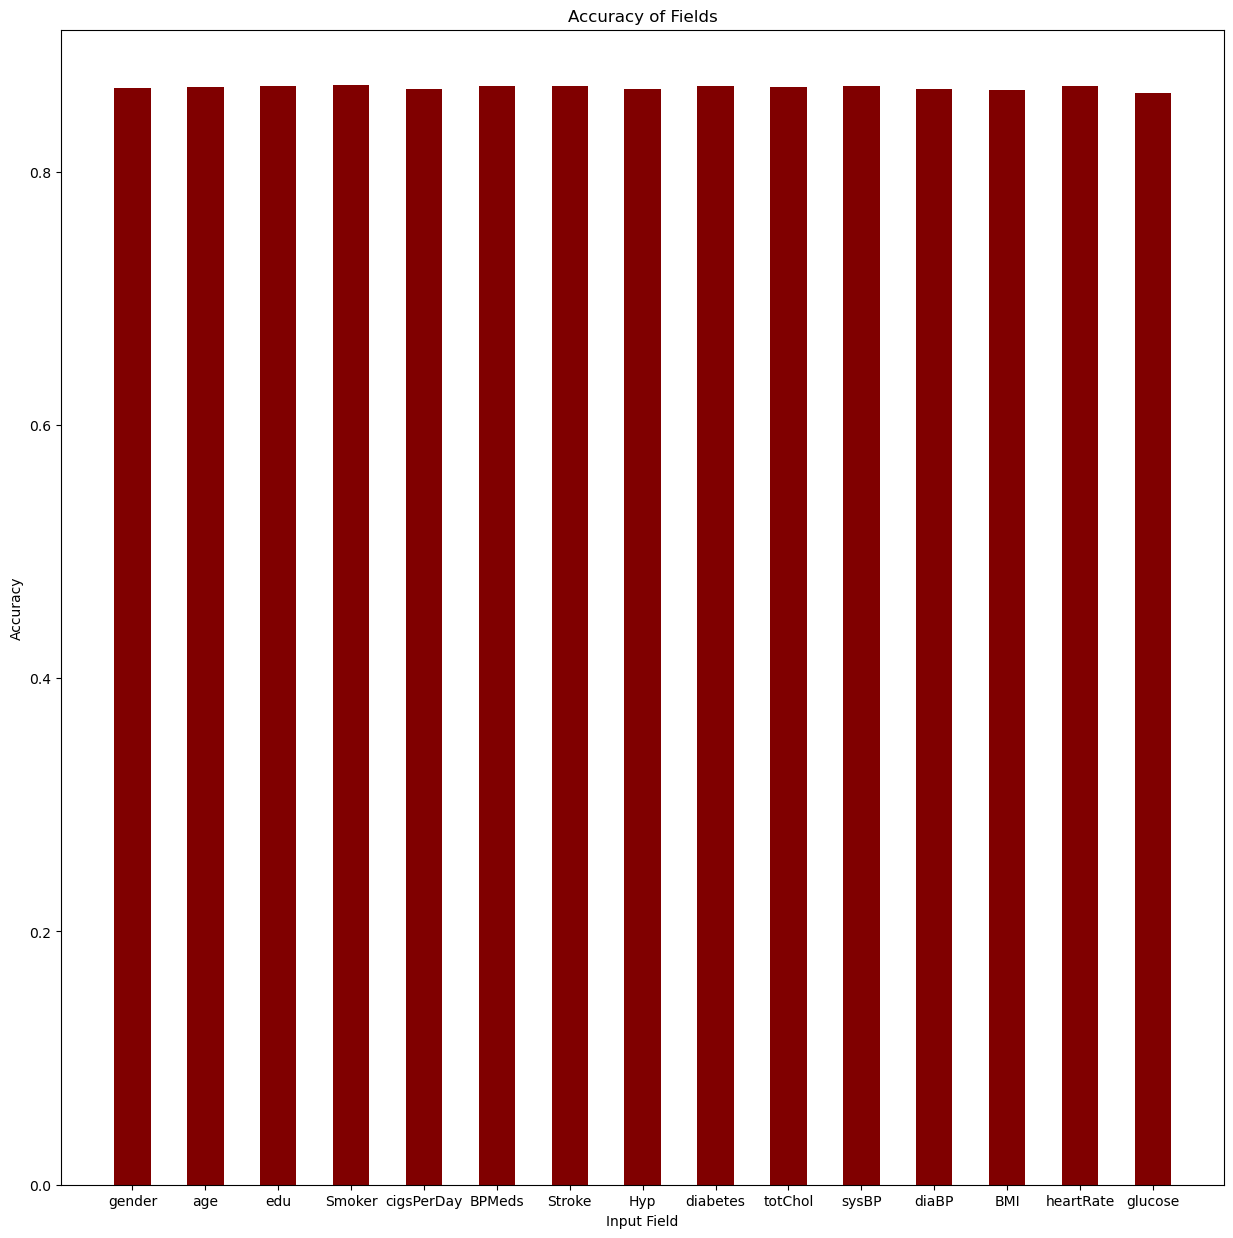

In [129]:
modelFields = list(modelAccurs.keys())
fieldValues = list(modelAccurs.values())
fig = plt.figure(figsize = (15, 15))
plt.bar(modelFields, fieldValues, color ='maroon', 
        width = 0.5)
 
plt.xlabel("Input Field")
plt.ylabel("Accuracy")
plt.title("Accuracy of Fields")
plt.show()

# Phase 5: Final Model

In [131]:
## Prep all datasets

# Select ratio
ratio = 0.70

total_rows = int(normal_df.shape[0])
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = normal_df[0:train_size]
test = normal_df[train_size:]

train_Y = train["TenYearCHD"]
train_X = train.drop(columns=["TenYearCHD","male","education","age"])
valid_Y = test["TenYearCHD"]
valid_X = test.drop(columns=["TenYearCHD","male","education","age"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)

In [132]:
finalModel = Sequential()
finalModel.add(Dense(1, input_dim = len(train_X[0, :]), activation='sigmoid'))

finalModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'my_final_best_model.weights.h5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b = EarlyStopping(monitor='loss', mode='min', patience=20, verbose=0)
finalHistory = finalModel.fit(train_X, train_Y, validation_data = (valid_X, valid_Y),  epochs=400, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/400


C:\Users\ikill\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5859 - loss: 0.7289 - val_accuracy: 0.6490 - val_loss: 0.6681
Epoch 2/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6925 - loss: 0.6274 - val_accuracy: 0.7457 - val_loss: 0.5910
Epoch 3/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7618 - loss: 0.5683 - val_accuracy: 0.7867 - val_loss: 0.5346
Epoch 4/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8043 - loss: 0.5155 - val_accuracy: 0.8314 - val_loss: 0.4926
Epoch 5/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8318 - loss: 0.4874 - val_accuracy: 0.8423 - val_loss: 0.4611
Epoch 6/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8293 - loss: 0.4623 - val_accuracy: 0.8487 - val_loss: 0.4378
Epoch 7/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8398 - loss: 0.4329 - val_accuracy: 0.8496 - val_loss: 0.4200
Epoch 8/400
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.8293 - loss: 0.4422 - val_ac

In [134]:
# Evaluate on the training set (should deliver high accuracy)
P = finalModel.predict(train_X)
accuracy = finalModel.evaluate(train_X, train_Y)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8424 - loss: 0.4162


In [135]:
#Evaluate on the validation set
P = finalModel.predict(valid_X)
accuracy = finalModel.evaluate(valid_X, valid_Y)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8704 - loss: 0.3531


## Visualization of the Final Model

{'verbose': 'auto', 'epochs': 400, 'steps': 256}


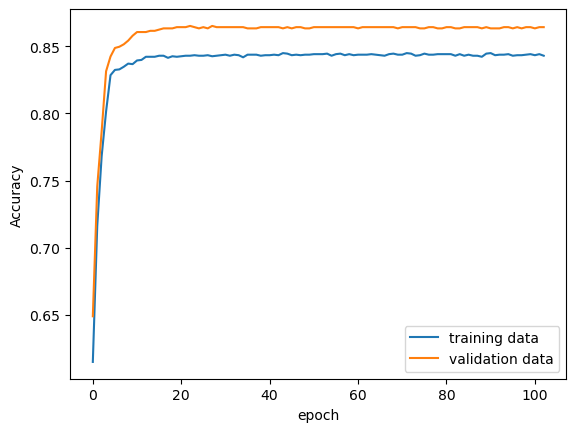

In [136]:
print(finalHistory.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(finalHistory.history['accuracy']) 
plt.plot(finalHistory.history['val_accuracy']) 
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()